<a href="https://colab.research.google.com/github/SalikFillah/Hard-Clustering/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# Running in Google Colab
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/SalikFillah/Case-Study-02-Data-Mining_Kelompok-5/main/data/MixlTup.csv
df = pd.read_csv("data/MixlTup.csv")
df

mkdir: cannot create directory ‘data’: File exists
--2023-05-06 09:52:27--  https://raw.githubusercontent.com/SalikFillah/Case-Study-02-Data-Mining_Kelompok-5/main/data/MixlTup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10239 (10.0K) [text/plain]
Saving to: ‘data/MixlTup.csv.1’

MixlTup.csv.1       100%[===================>]  10.00K  --.-KB/s    in 0s      

2023-05-06 09:52:27 (67.2 MB/s) - ‘data/MixlTup.csv.1’ saved [10239/10239]



,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


# Preprocessing

## Menghapus Variabel yang tidak digunakan

In [ ]:
# Drop kolom pertama karena tidak berguna (hanya index)
df.drop("ID", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ KB


## Mengganti Elemen yang Menyimpang

In [ ]:
df.rename(columns = {'Pendapatan-per-bulan':'Pendapatanbulanan'}, inplace = True)
df.rename(columns = {'skor-pengeluaran':'Skorpengeluaran'}, inplace = True)
df.rename(columns = {'Jenis Kelamin':'JenisKelamin'}, inplace = True)
df

,JenisKelamin,Umur,Pendapatanbulanan,Skorpengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


In [ ]:
#Mengganti nama variable agar memudahkan data cleaning
df.rename(columns = {'Pendapatan-per-bulan':'Pendapatanbulanan'}, inplace = True)

In [ ]:
#Menghapus 'Rp' pada variable Pendapatanbulanan dan membulatkan nilainya
df['Pendapatanbulanan'] = df['Pendapatanbulanan'].str.replace('Rp', '')
df['Pendapatanbulanan'] = df['Pendapatanbulanan'].str.replace(',', '')
df['Pendapatanbulanan'] = df['Pendapatanbulanan'].astype('float')
#Pembulatan
df = df.round(decimals=0)
#Mengubah type data variable Pendapatanbulanan menjadi Int64

df['Pendapatanbulanan'] = df['Pendapatanbulanan'].astype('Int64')
df

,JenisKelamin,Umur,Pendapatanbulanan,Skorpengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


In [ ]:
#Mengganti value tiap data yang memiliki value yang tidak jelas
df.Kota[df.Kota == 'JJakarta'] = 'Jakarta'
df.Umur[df.Umur == "35'"] = 35
df.JenisKelamin[df.JenisKelamin == '-'] = np.NaN
df.FavFlavor[df.FavFlavor == 9] = np.NaN
df.Umur[df.Umur == 2] = 20
df.Promo[df.Promo == 5.0] = 3.0
df.FavFlavor[df.FavFlavor == 2] = np.NaN
df

,JenisKelamin,Umur,Pendapatanbulanan,Skorpengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,NaN
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6.0
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3.0
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7.0
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8.0
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0.0
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5.0
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7.0
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0.0


## Mengubah Tipe Data

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(df))
# Ukuran Data
N, P = df.shape
'baris = ', N, ', Kolom = ', P

# tipe data per kolom
df.dtypes

<class 'pandas.core.frame.DataFrame'>


JenisKelamin          object
Umur                  object
Pendapatanbulanan      Int64
Skorpengeluaran        int64
Menikah               object
Kota                  object
Promo                float64
HariFav               object
FavFlavor            float64
dtype: object

In [ ]:
#Mengubah tipe data
df['JenisKelamin'] = df['JenisKelamin'].astype('category')
df['Umur'] = df['Umur'].astype('int64')
df['Skorpengeluaran'] = df['Skorpengeluaran'].astype('int64')
df['FavFlavor'] = df['FavFlavor'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   JenisKelamin       195 non-null    category
 1   Umur               200 non-null    int64   
 2   Pendapatanbulanan  200 non-null    Int64   
 3   Skorpengeluaran    200 non-null    int64   
 4   Menikah            188 non-null    object  
 5   Kota               200 non-null    object  
 6   Promo              194 non-null    float64 
 7   HariFav            200 non-null    object  
 8   FavFlavor          179 non-null    category
dtypes: Int64(1), category(2), float64(1), int64(2), object(3)
memory usage: 12.1+ KB


## Mengatasi Missing Value

In [ ]:
#Cek missing value
df.isnull().sum()

JenisKelamin          5
Umur                  0
Pendapatanbulanan     0
Skorpengeluaran       0
Menikah              12
Kota                  0
Promo                 6
HariFav               0
FavFlavor            21
dtype: int64

In [ ]:
# Mengatasi MV
df.bfill(inplace = True)

In [ ]:
df

,JenisKelamin,Umur,Pendapatanbulanan,Skorpengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,6.0
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6.0
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3.0
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7.0
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8.0
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1.0,Senin,0.0
196,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5.0
197,Wanita,35,43032786,79,1,Depok,1.0,Senin,7.0
198,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0.0


In [ ]:
df.isna().sum()

JenisKelamin         0
Umur                 0
Pendapatanbulanan    0
Skorpengeluaran      0
Menikah              0
Kota                 0
Promo                0
HariFav              0
FavFlavor            0
dtype: int64

## Mengatasi Outlier

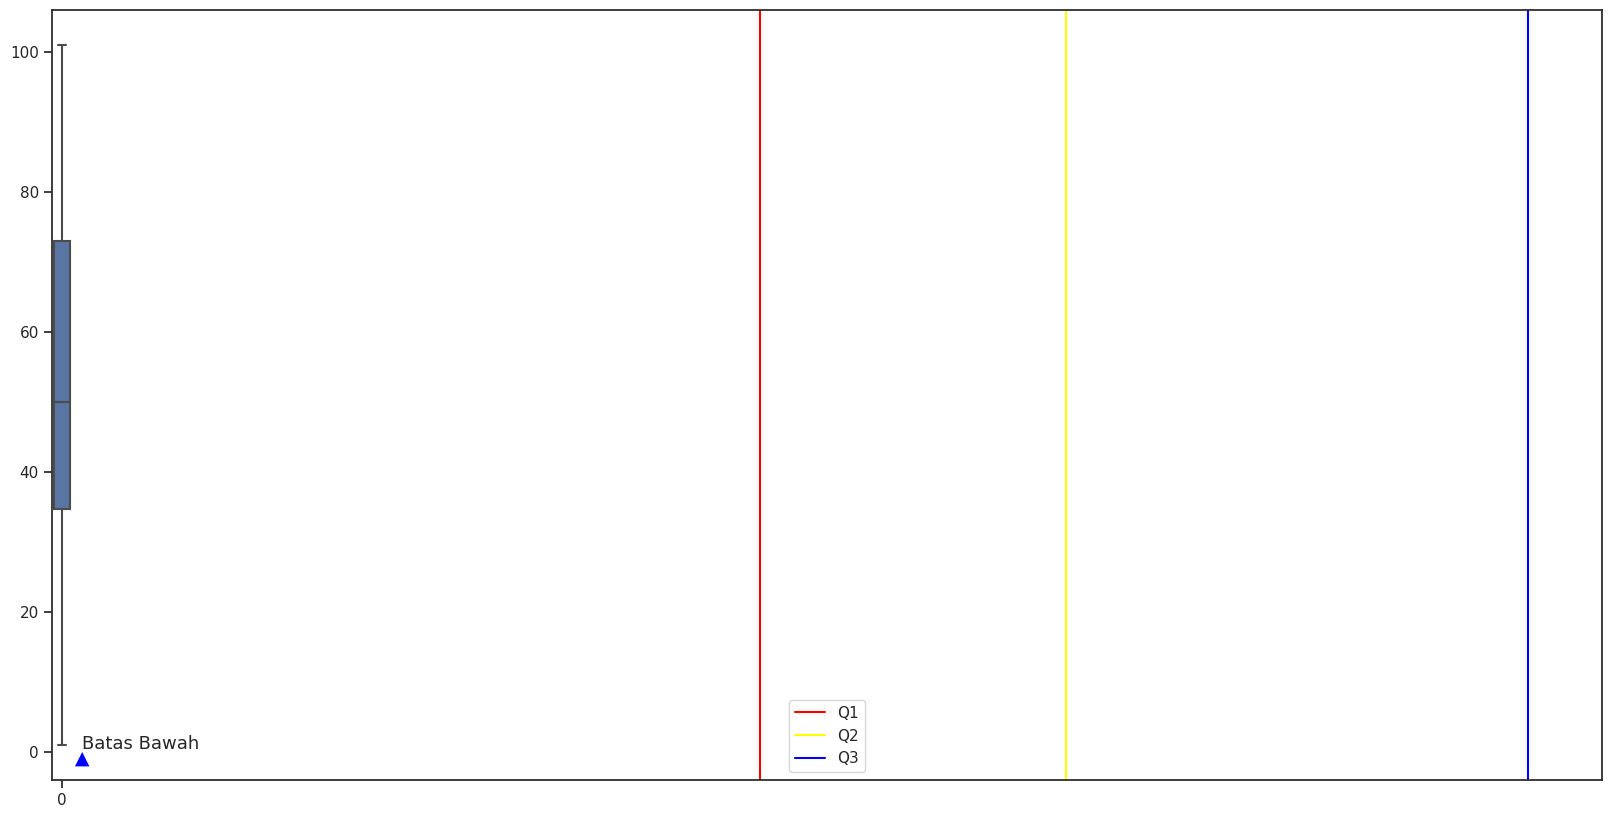

In [ ]:
#Cek adanya outlier pada variabel Skorpengeluaran
plt.figure(figsize = (20, 10))
sns.boxplot(df['Skorpengeluaran'])
plt.axvline(df['Skorpengeluaran'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['Skorpengeluaran'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['Skorpengeluaran'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['Skorpengeluaran'].describe()['max'],0.1), xytext = (df['Skorpengeluaran'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Skorpengeluaran'].describe()['75%'] - df['Skorpengeluaran'].describe()['25%']
plt.annotate('Batas Atas', (df['Skorpengeluaran'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['Skorpengeluaran'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['Skorpengeluaran'].describe()['min'], 0.2), 
             xytext = (df['Skorpengeluaran'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

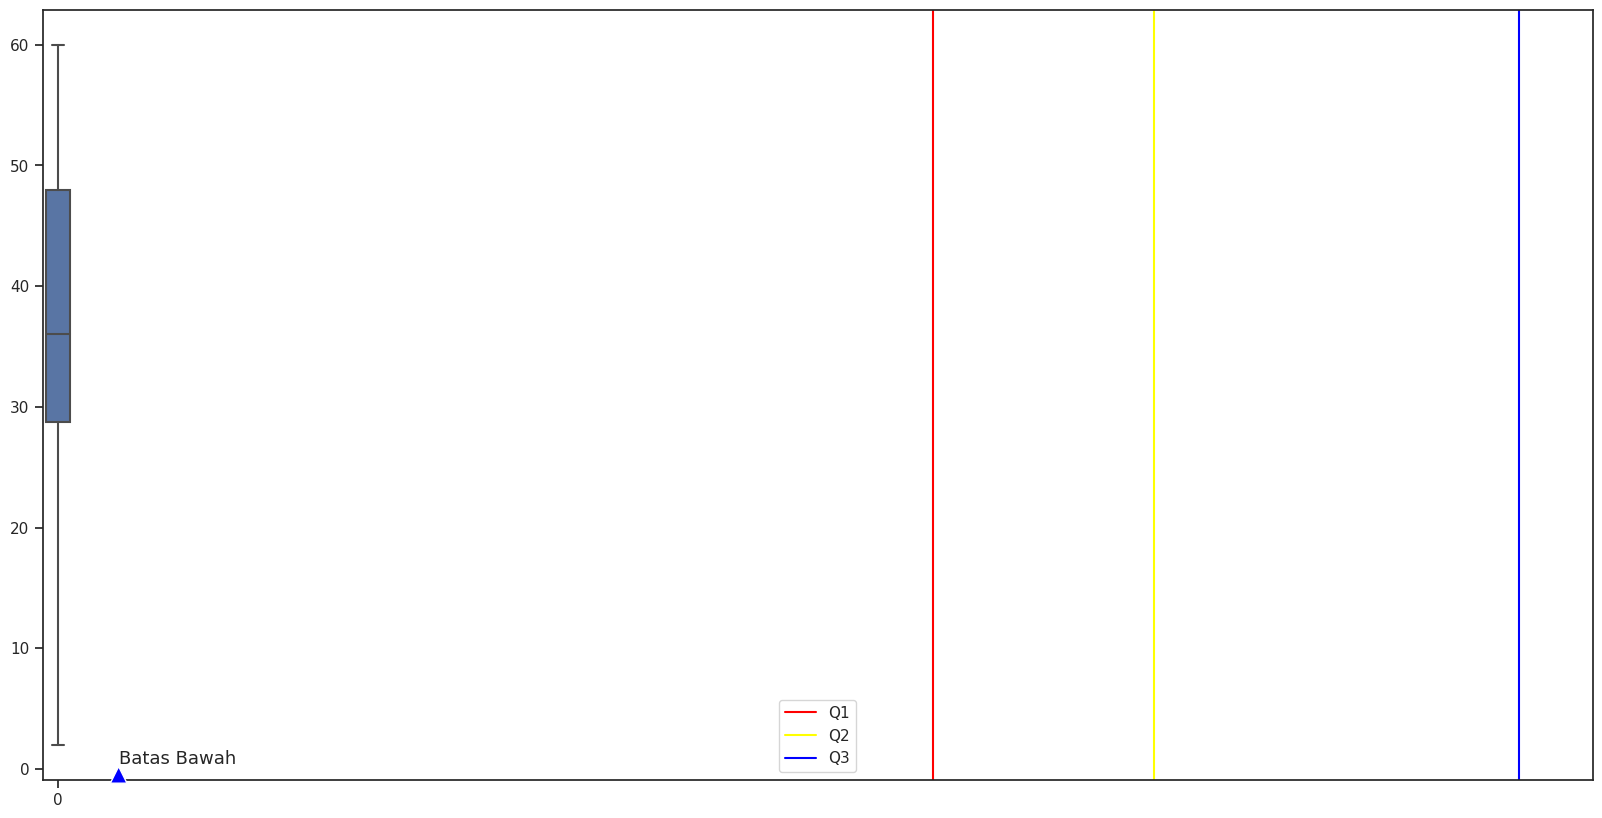

In [ ]:
#Cek adanya outlier pada variabel Umur
plt.figure(figsize = (20, 10))
sns.boxplot(df['Umur'])
plt.axvline(df['Umur'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['Umur'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['Umur'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['Umur'].describe()['max'],0.1), xytext = (df['Umur'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Umur'].describe()['75%'] - df['Umur'].describe()['25%']
plt.annotate('Batas Atas', (df['Umur'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['Umur'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['Umur'].describe()['min'], 0.2), 
             xytext = (df['Umur'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

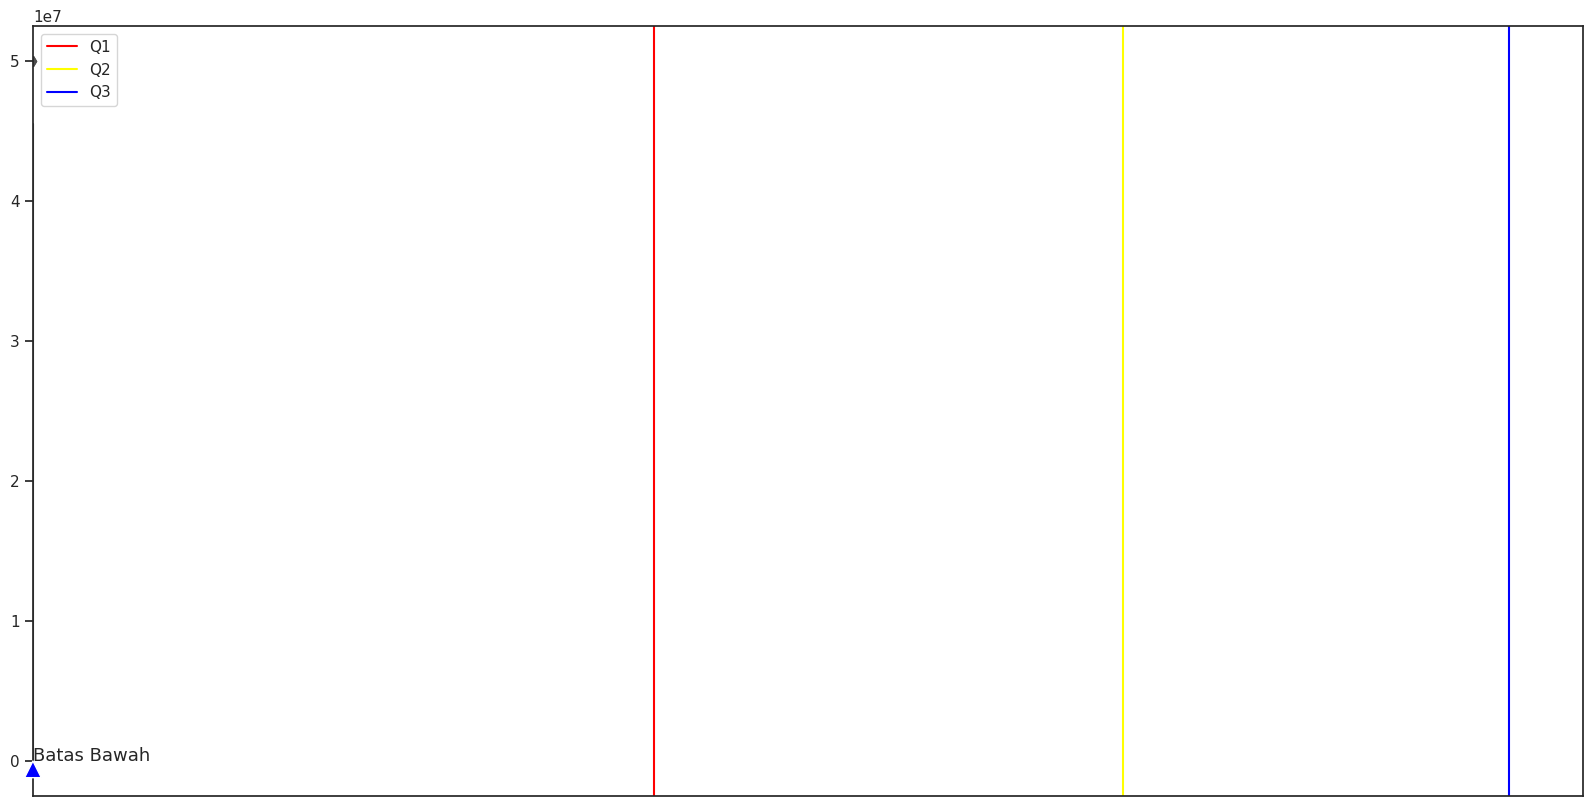

In [ ]:
#Cek adanya outlier pada variabel Pendapatanbulanan
plt.figure(figsize = (20, 10))
sns.boxplot(df['Pendapatanbulanan'])
plt.axvline(df['Pendapatanbulanan'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['Pendapatanbulanan'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['Pendapatanbulanan'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['Pendapatanbulanan'].describe()['max'],0.1), xytext = (df['Pendapatanbulanan'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Pendapatanbulanan'].describe()['75%'] - df['Pendapatanbulanan'].describe()['25%']
plt.annotate('Batas Atas', (df['Pendapatanbulanan'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['Pendapatanbulanan'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['Pendapatanbulanan'].describe()['min'], 0.2), 
             xytext = (df['Pendapatanbulanan'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

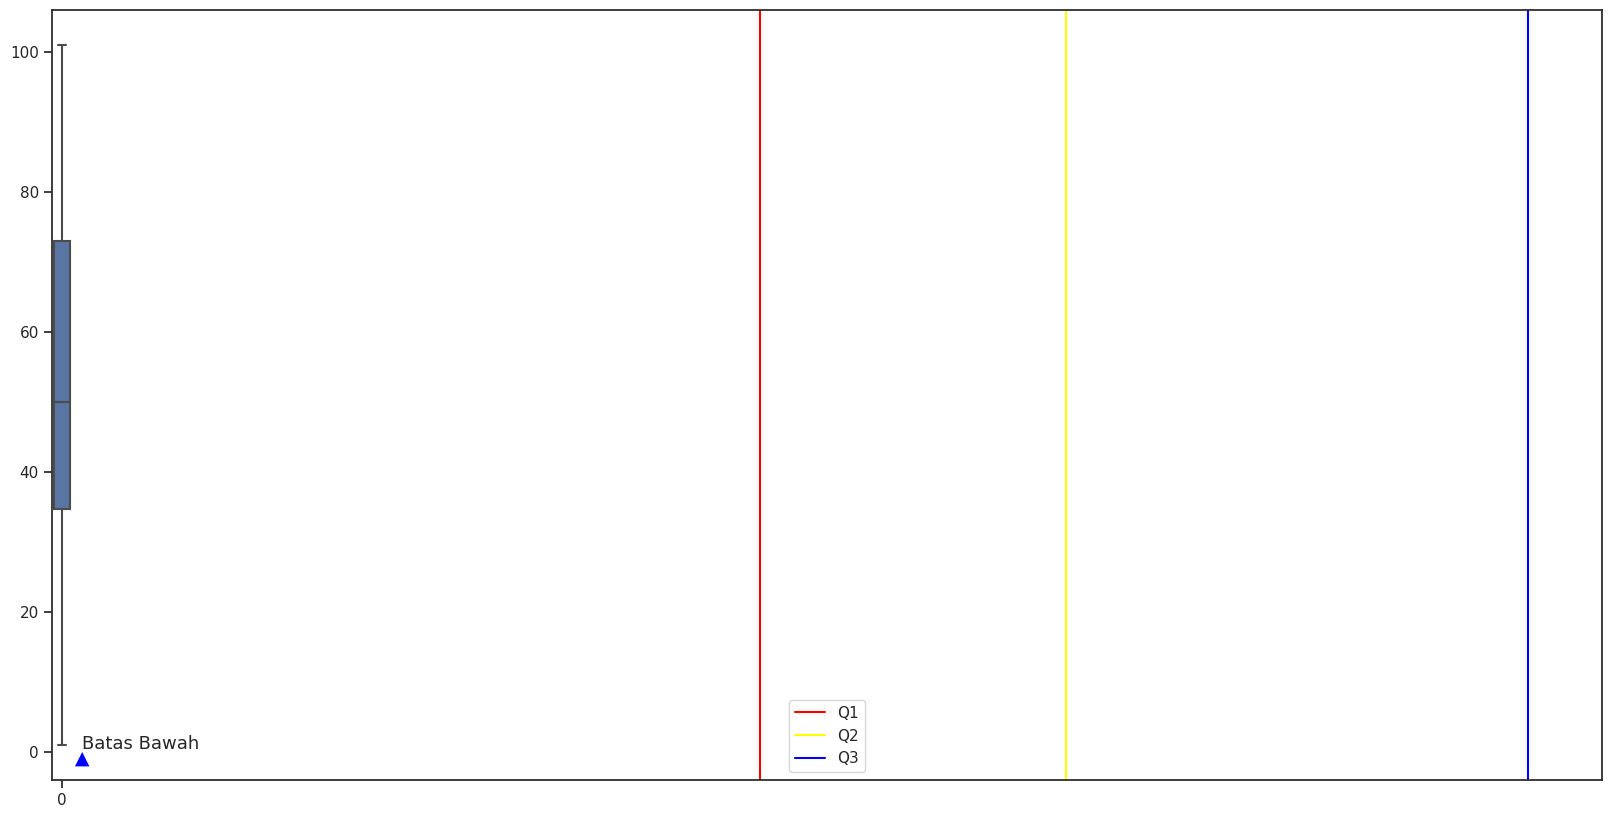

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(df['Skorpengeluaran'])
plt.axvline(df['Skorpengeluaran'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['Skorpengeluaran'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['Skorpengeluaran'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['Skorpengeluaran'].describe()['max'],0.1), xytext = (df['Skorpengeluaran'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Skorpengeluaran'].describe()['75%'] - df['Skorpengeluaran'].describe()['25%']
plt.annotate('Batas Atas', (df['Skorpengeluaran'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['Skorpengeluaran'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['Skorpengeluaran'].describe()['min'], 0.2), 
             xytext = (df['Skorpengeluaran'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

In [ ]:
# Mengatasi outlier
print(df['Skorpengeluaran'].quantile(0.10))
print(df['Skorpengeluaran'].quantile(0.90))


13.0
88.0


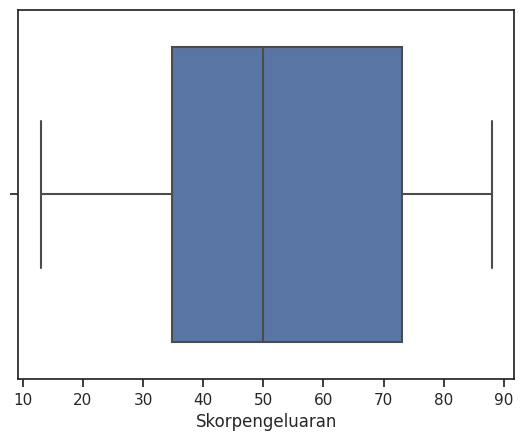

In [ ]:
# Mengatasi outlier
df["Skorpengeluaran"] = np.where(df["Skorpengeluaran"] <13.0, 13.0 ,df['Skorpengeluaran'])
df["Skorpengeluaran"] = np.where(df["Skorpengeluaran"] >88.0, 88.0,df['Skorpengeluaran'])
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Skorpengeluaran'])
plt.show()

In [ ]:
# Mengatasi outlier
print(df['Pendapatanbulanan'].quantile(0.10))
print(df['Pendapatanbulanan'].quantile(0.90))


3647540.400000001
32131147.39999999


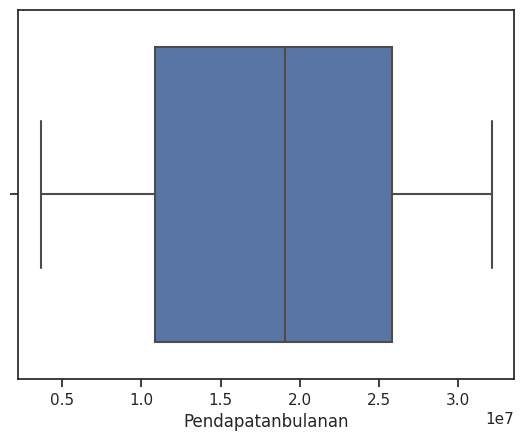

In [ ]:
df["Pendapatanbulanan"] = np.where(df["Pendapatanbulanan"] <3647540.400000001, 3647540.400000001,df['Pendapatanbulanan'])
df["Pendapatanbulanan"] = np.where(df["Pendapatanbulanan"] >32131147.39999999, 32131147.39999999,df['Pendapatanbulanan'])
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Pendapatanbulanan'])
plt.show()

# **EDA**

In [ ]:
bins = np.linspace(min(df['Umur']), max(df['Umur']), 4)
kategori = ['Muda', 'Dewasa', 'Tua']
df['Kategori'] = pd.cut(df['Umur'], bins, labels=kategori, include_lowest=True)
df

,JenisKelamin,Umur,Pendapatanbulanan,Skorpengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Kategori
0,Wanita,49,13114754,52.0,1,Jakarta,1.0,Sabtu,6.0,Tua
1,Wanita,32,32131147.4,86.0,1,Depok,1.0,Minggu,6.0,Dewasa
2,Pria,51,15983606,41.0,1,Jakarta,2.0,Minggu,3.0,Tua
3,Pria,19,12704918,55.0,0,Jakarta,1.0,Rabu,7.0,Muda
4,Wanita,38,20081967,42.0,1,Jakarta,2.0,Senin,8.0,Dewasa
...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73.0,1,Depok,1.0,Senin,0.0,Dewasa
196,Pria,57,15983606,51.0,1,Jakarta,1.0,Minggu,5.0,Tua
197,Wanita,35,32131147.4,79.0,1,Depok,1.0,Senin,7.0,Dewasa
198,Wanita,23,3647540.4,88.0,1,Depok,0.0,Selasa,0.0,Dewasa


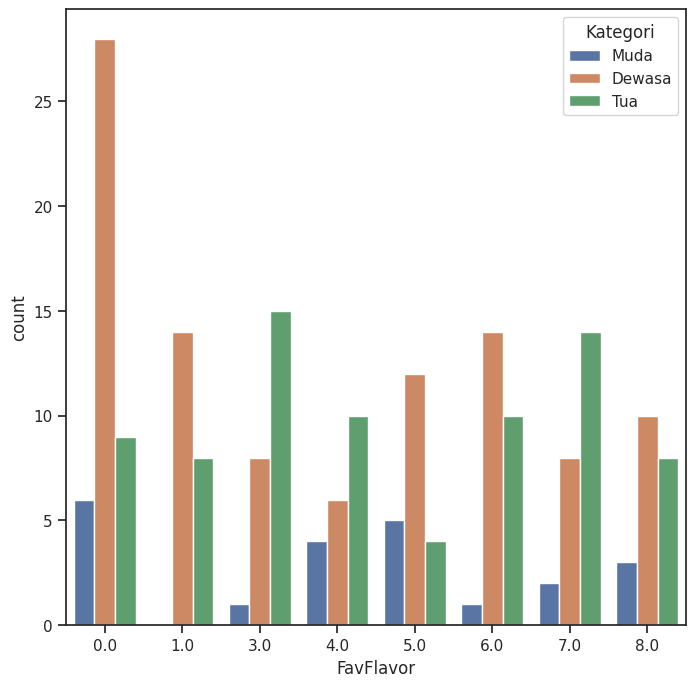

In [ ]:
plt.figure(figsize=(8,8)) 
p = sns.countplot(x="FavFlavor", hue="Kategori", data=df)

### Deskripsi Rasa
![](https://drive.google.com/uc?export=view&id=1oZc-dZG8xMRD7K_HhUP2NUTwiKxh8JFD
)


### Interpretasi
Rasa vanilla menjadi rasa favorit di kalangan muda dan dewasa, sedangkan untuk kalangan tua cenderung menyukai rasa Coklat dan Caramel Pecan, rasa yang cenderung sedikit diminati oleh kalangan muda adalah Cokelat, rekomendasi yang dapat kami berikan kepada perusahaan agar rasa Cokelat ini menarik bagi kalangan muda dengan membuat inovasi kemasan yang lebih mengikuti trend anak muda zaman sekarang. 
Untuk kalangan tua rasa yang cenderung sedikit diminati adalah Cotton Candy, untuk kalangan dewasa yang cenderung sedikit diminati adalah Blueberry.

Karena Mixltup ingin "scale" bisnis-nya ke kota lain maka kita merekomendasikan untuk memfokuskan untuk kalangan dewasa karena pembelian yang dilakukan cenderung dominan dari kalangan dewasa.





## Rasa Es Krim Favorit Apa Berdasarkan Gender?

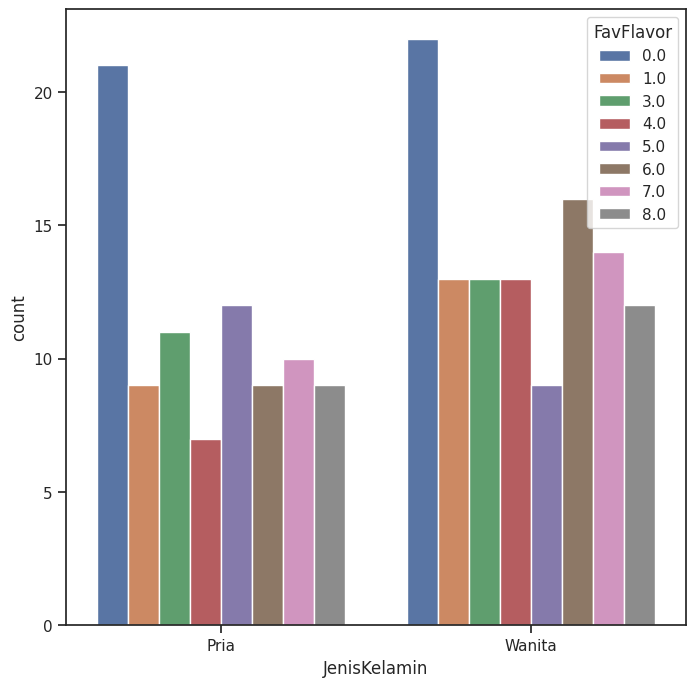

In [ ]:
plt.figure(figsize=(8,8)) 
p = sns.countplot(x="JenisKelamin", hue="FavFlavor", data=df)

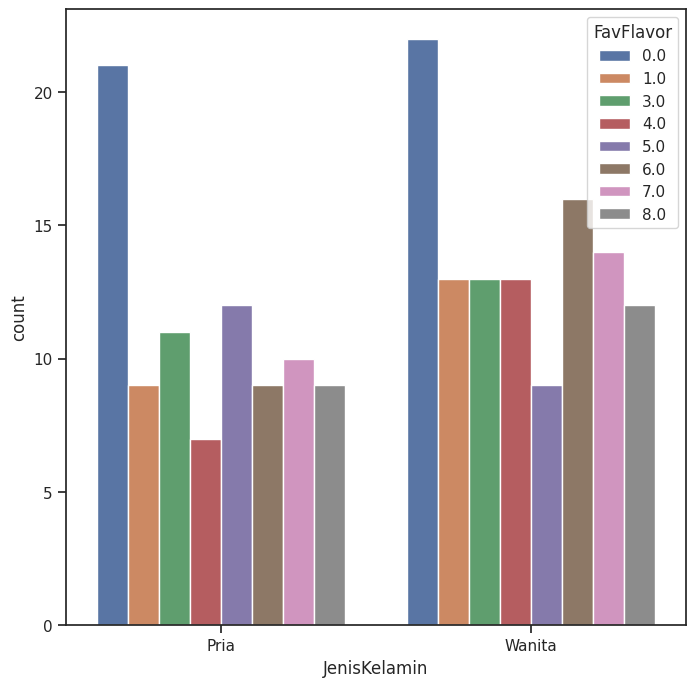

In [ ]:
plt.figure(figsize=(8,8)) 
p = sns.countplot(x="JenisKelamin", hue="FavFlavor", data=df)

### Interpretasi:
Rasa Es Krim Favorit Apa Berdasarkan Gender?
Rasa Es krim yang cenderung paling banyak diminati dari kalangan pria dan kalangan wanita adalah vanilla. 
Saran yang kami berikan untuk perusahaan MixITup yaitu memperbanyak stok rasa vanila agar selalu tersedia rasa vanilla di outlet dan customer tidak kehabisan untuk mendapatkan vanilla tersebut.
Sedangkan rasa dengan peminat terendah dari kalangan pria adalah rasa bluebery dan kalangan wanita adalah rasa bubblegum/cotton candy, 
sehingga kami ingin perusahaan MixlTup meningkatkan strategi marketing dengan cara memberi promo atau diskon pada rasa blueberry dan bubblegum. Ataupun dapat digabungkan strategi keduanya.
Sebagai contoh karena vnilla merupakan rasa terfavorit, bagi pria yng membeli bluberry akan mendapatkan gratis rsa vanilla, dan untuk wanita jika membeli rasa bubblegum/cotton candy akan mendapatkan free rasa vanilla.

## Rasa Es Krim Favorit Apa Berdasarkan umur?

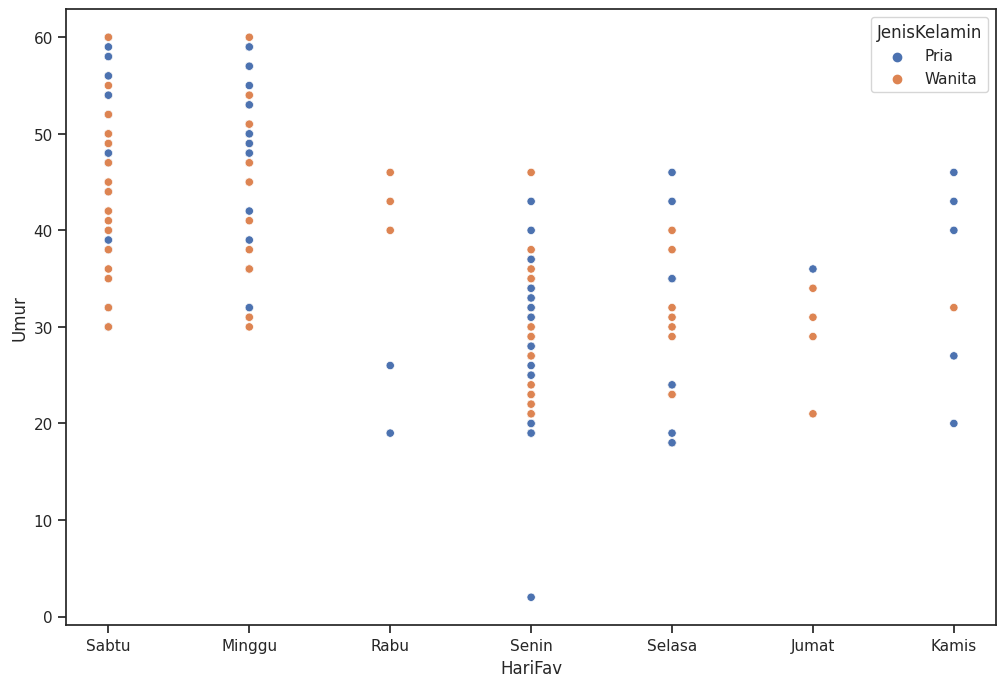

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
p = sns.scatterplot(x=df['HariFav'], y=df['Umur'], hue = df['JenisKelamin'], ax=ax)

### Interpretasi:

Kota dengan skor pengeluaran paling sedikit yang akan menjadi fokus perusahaan untuk mengembangkan outlet di kota tersebut.
Kota tangerang cenderung memiliki skor-pengeluaran yang lebih rendah dibandingkan dengan dua kota lainnya. Oleh karena itu, saran yang dapat kami berikan untuk perusahaan MixITup yaitu lebih fokus untuk megembangkan outlet di Kota Tangerang.
Pengembangan yang dapat dilakukan adalah meningkatkan customer experience agar skor-pengeluaran tiap individu meningkat.
Sedangkan untuk skor pengeluaran di Kota Jakarta juga cenderung lebih rendah dari kota Depok, perusahaan MixITup dapat meningkatkannya dan menerapkan hal-hal baik yang terdapat pada outlet di Kota Depok.
Pada skor pengeluaran di Kota Depok yang cenderung lebih banyak dari Kota Jakarta dan Kota Tangerang. Maka dari itu perusahaan dapat tetap mempertahankan penglaman yang baik terhadap customer.
Namun di daerah Kota Depok itu sendiri masih terdapat satu pelanggan yang membuat skor pengeluaran daerah Depok dibawah 60. Jika dapat diketahui individu tersebut bisa dapat ditangani dengan cara memberitahu customer tersebut bahwa outlet MixITup memberikan promo dan benefit lain.
sehingga, skor pengeluaran di daerah Kota Depok dapat berada diatas 60.

## Rekomendasi penjualan rasa es krim per hari menyesuaikan target jenis kelamin

### Interpretasi:
Pada dua diagram sebelumnya, pada hari Sabtu, pelanggan didominasi oleh pelanggan wanita dengan rasa yang paling diminati adalah rasa vanilla.
Semantara pada hari Senin, pelanggan didominasi oleh pelanggan pria dengan
rasa yang paling diminati adalah rasa vanilla. Untuk itu, saran yang dapat kami rekomendasikan adalah menambah stok rasa vanilla pada hari Senin dan Sabtu dengan harapan meningkatkan tingkat penjualan.

## Hari favorit mengunjungi mixitup dengan promo

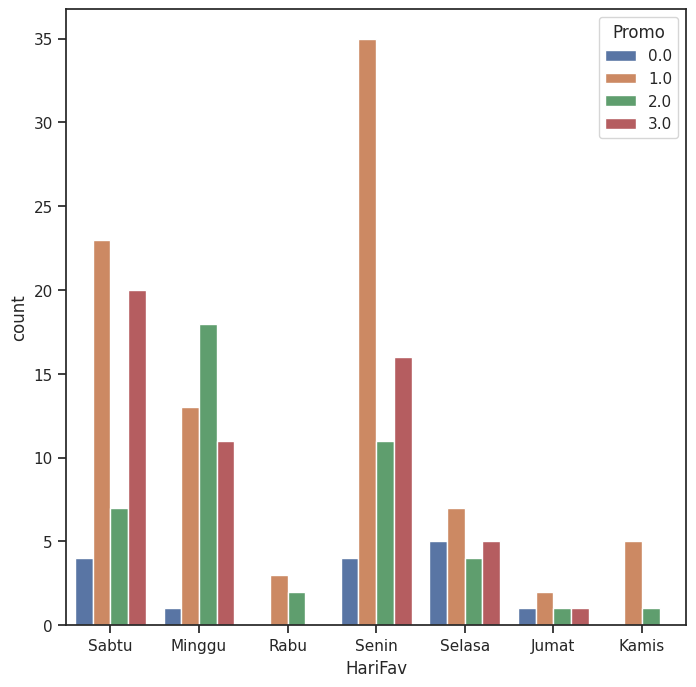

In [ ]:
plt.figure(figsize=(8,8)) 
p = sns.countplot(x="HariFav", hue="Promo", data=df)

### Interpretasi:

Hari Favorit mengunjungi mixITup dengan promo.
Hari favorit yang cenderung sering dikunjungi yaitu hari senin namun customer jarang memakai promo di hari tersebut.
Hari Rabu, Kamis dan Jumat cenderung jarang dikunjungi customer.
Saran yang kami berikan untuk perusahaan MixITup untuk memikirkan strategi marketing terbaik di hari Rabu, Kamis dan Jumat agar penjualan dapat meningkat.
Dapat berupa penambahan kuota promo atau benefit yang lebih menarik untuk customer.
Penggunaan promo paling banyak digunakan oleh customer ada di hari Sabtu. Oleh karena itu, perusahaan disarankan tetap mempertahankan promo atau diskon di hari tersebut.

## Kota dengan skor pengeluaran paling sedikit yang akan menjadi fokus perusahaan untuk mengembangkan outlet di kota tersebut.

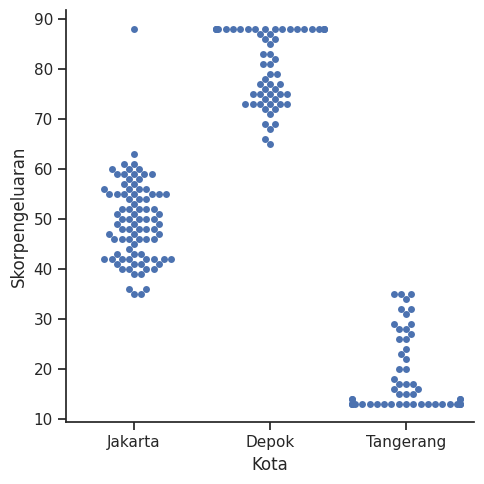

In [ ]:
p= sns.catplot(x="Kota", y="Skorpengeluaran", kind="swarm", data=df)

# Customer Segmentation

## Clustering Analysis

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

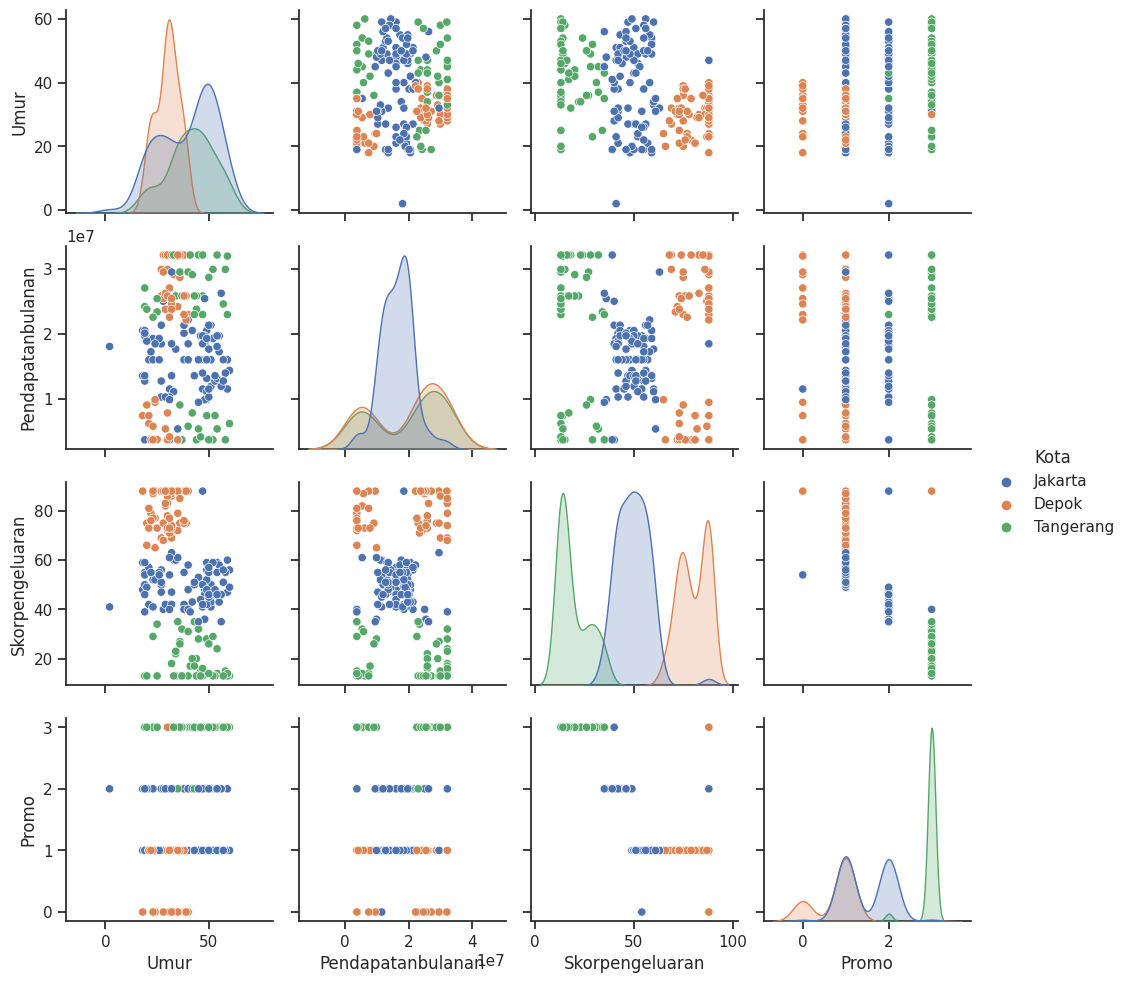

In [ ]:
# Melihat sebaran data
g = sns.pairplot(df, hue= "Kota")

## K-Means++

### Melihat persebaran data yang akan diclustering


Text(0, 0.5, 'Pendapatanperbulan')

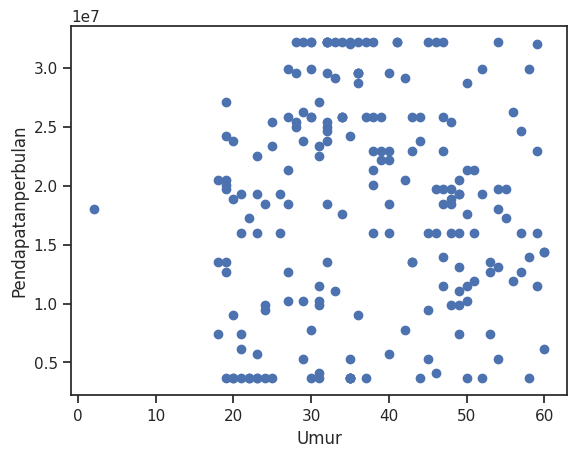

In [ ]:
#Persebaran data pada variable Umur dan Pendapatanbulanan

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
plt.scatter(df['Umur'], df['Pendapatanbulanan'])
plt.xlabel('Umur')
plt.ylabel('Pendapatanperbulan')

In [ ]:
#Standarisasi menggunakan Zscore

df_numerik1 = df[['Umur', 'Pendapatanbulanan']]
dfzcore = (df_numerik1 - df_numerik1.mean()) / df_numerik1.std()
dfzcore

,Umur,Pendapatanbulanan
0,0.971030,-0.558339
1,-0.446532,1.524211
2,1.137802,-0.244161
3,-1.530551,-0.603221
4,0.053784,0.204664
...,...,...
195,-0.529918,-1.545754
196,1.638118,-0.244161
197,-0.196374,1.524211
198,-1.197006,-1.595125


In [ ]:
km = KMeans(n_clusters=8)
km
 
y_predicted = km.fit_predict(dfzcore[['Umur','Pendapatanbulanan']])
y_predicted
 
dfzcore['FavFlavor'] = y_predicted
dfzcore

,Umur,Pendapatanbulanan,FavFlavor
0,0.971030,-0.558339,1
1,-0.446532,1.524211,3
2,1.137802,-0.244161,6
3,-1.530551,-0.603221,2
4,0.053784,0.204664,5
...,...,...,...
195,-0.529918,-1.545754,7
196,1.638118,-0.244161,6
197,-0.196374,1.524211,3
198,-1.197006,-1.595125,4


3    47
5    32
2    25
7    22
1    20
6    20
4    17
0    17
Name: FavFlavor, dtype: int64

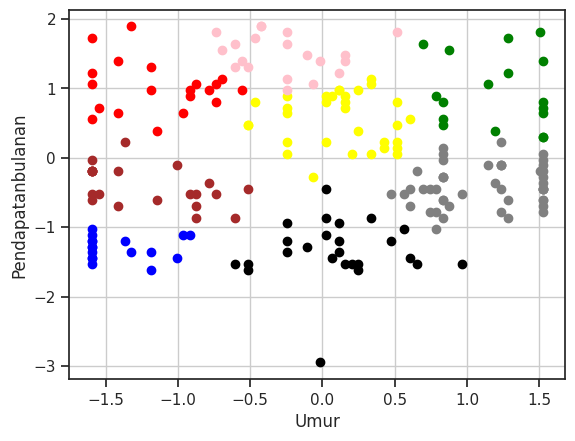

In [ ]:
#Visualisasi Clustering

df1 = dfzcore[dfzcore.FavFlavor==0]
df2 = dfzcore[dfzcore.FavFlavor==1]
df3 = dfzcore[dfzcore.FavFlavor==2]
df4 = dfzcore[dfzcore.FavFlavor==3]
df5 = dfzcore[dfzcore.FavFlavor==4]
df6 = dfzcore[dfzcore.FavFlavor==5]
df7 = dfzcore[dfzcore.FavFlavor==6]
df8 = dfzcore[dfzcore.FavFlavor==7]

 
plt.scatter(df1.Pendapatanbulanan,df1['Umur'],color='green')
plt.scatter(df2.Pendapatanbulanan,df2['Umur'],color='red')
plt.scatter(df3.Pendapatanbulanan,df3['Umur'],color='black')
plt.scatter(df4.Pendapatanbulanan,df4['Umur'],color='gray')
plt.scatter(df5.Pendapatanbulanan,df5['Umur'],color='blue')
plt.scatter(df6.Pendapatanbulanan,df6['Umur'],color='yellow')
plt.scatter(df7.Pendapatanbulanan,df7['Umur'],color='pink')
plt.scatter(df8.Pendapatanbulanan,df8['Umur'],color='brown')

 
plt.xlabel('Umur')
plt.ylabel('Pendapatanbulanan')
plt.grid()
display(dfzcore.FavFlavor.value_counts())


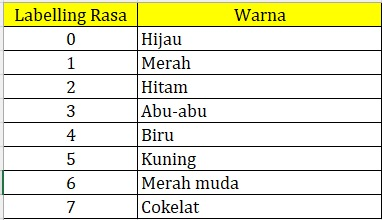

### Interpretasi:

Untuk kalangan muda dengan penghasilan cenderung rendah menyukai rasa dengan labelling warna merah muda, untuk kalangan muda dengan penghasilan menengah menyukai rasa dengan labelling warna hitam, untuk kalangan muda dengan penghasilan cenderung lebih tinggi menyukai rasa dengan labelling warna merah, untuk kalangan dewasa dengan penghasilan cenderung rendah menyukai rasa dengan labelling warna biru, untuk kalangan dewasa dengan penghasilan menengah menyukai rasa dengan labelling warna hijau, untuk dewasa dengan penghasilan cenderung lebih tinggi menyukai rasa dengan labelling warna kuning. Sementara untuk usia tua dengan penghasilan menengah menyukai rasa dengan labelling warna merah, dan untuk usia dengan penghasilan cenderung lebih tinggi menyukai rasa dengan labelling warna abu-abu.


# Penutup:

Akhir kata, kami memohon maaf dari semua insight yang kami berikan kepada perusahaan MIxITup, kami belum bisa memastikan hal tersebut adalah yang terbaik.
Diluar dari data yang kami berikan pastilah ada variabel lin yang menunjang data-data yang lain menjadi menarik.
Dari data yg diberikan terdapat kekurangan variabel terkait harga tiap rasa. Tidak menutup kemungkinan vanilla yang cenderung paling banyak diminati karena harganya yang murah.
Oleh karena itu, insight yang telah kami berikan belum sepenuhnya dapat menjelaskan secara menyeluruh.